In [1]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from jupyterthemes import jtplot
jtplot.style()
np.random.seed(42)

# Import Moons

In [2]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples = 100000, noise = 0.4)

In [3]:
X.shape

(100000, 2)

# Utility function to plot the data

In [4]:
from matplotlib.colors import ListedColormap
from matplotlib import cm

def plot_data(X, y, clf = None, alpha = 0.1):
    fig = plt.figure(figsize = (15, 10))
    ax = plt.axes()
    cmap = custom_cmap = cm.get_cmap('viridis', 10)
        
    # plot data points 
    ax.plot(X[:, 0][y == 0], X[:, 1][y == 0], 's', color = 'blue', label = 'negetive', alpha = alpha)
    ax.plot(X[:, 0][y == 1], X[:, 1][y == 1], '^', color = 'green', label = 'positive', alpha = alpha)
    
    if clf != None:
        x_grid = np.linspace(-3, 3.5, 100)
        y_grid = np.linspace(-3, 3, 100)

        x1, x2 = np.meshgrid(x_grid, y_grid)  
        x_flat = np.c_[x1.ravel(), x2.ravel()]

        y_pred = clf.predict(x_flat).reshape(x1.shape)
        plt.contourf(x1, x2, y_pred, cmap=cmap, alpha=0.4)
    
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    
    plt.legend()

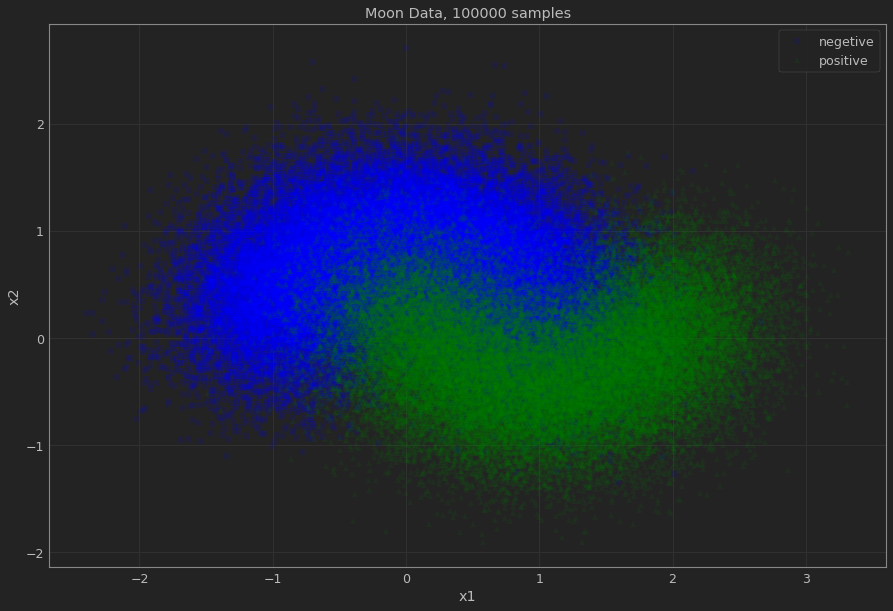

In [5]:
plot_data(X, y)
plt.title('Moon Data, 100000 samples')
plt.show()

# Split the Data

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

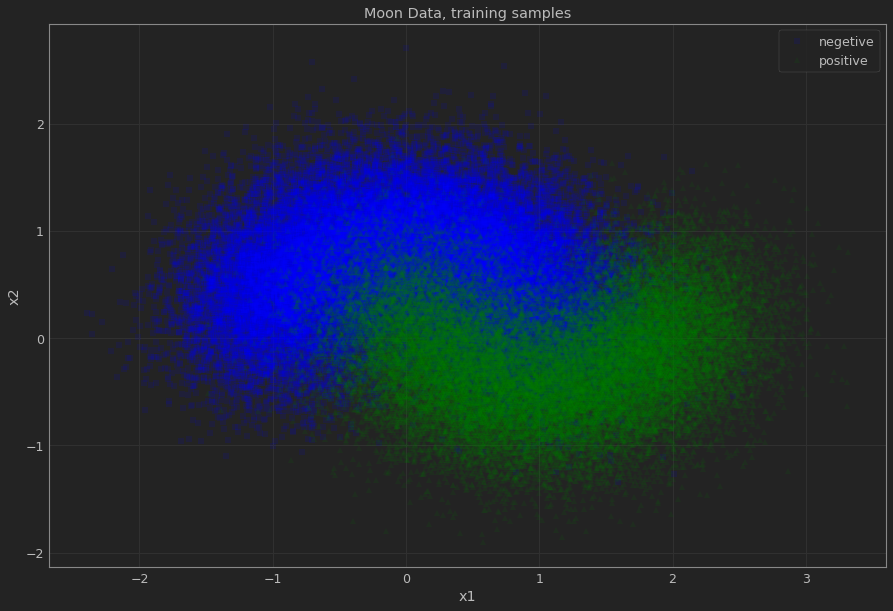

In [7]:
plot_data(X_train, y_train)
plt.title('Moon Data, training samples')
plt.show()

# Grid Search

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [9]:
parameters = {
    'max_depth': [3, 8, 15], 
    'min_samples_leaf': [50, 300, 1000],
    'max_leaf_nodes' : [4, 8, 16]
}
dtc = DecisionTreeClassifier()
clf_gcv = GridSearchCV(dtc, parameters, cv = 5, scoring = 'f1', verbose = 1)
clf_gcv.fit(X_train, y_train)
clf_gcv.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


DecisionTreeClassifier(max_depth=8, max_leaf_nodes=16, min_samples_leaf=50)

In [10]:
parameters = {
    'max_depth': [3, 8, 15], 
    'min_samples_leaf': [50, 300, 1000],
    'max_leaf_nodes' : [4, 8, 16]
}
dtc = DecisionTreeClassifier()
clf_gcv = GridSearchCV(dtc, parameters, cv = 3, scoring = 'f1', verbose = 1)
clf_gcv.fit(X_train, y_train)
clf_gcv.best_estimator_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


DecisionTreeClassifier(max_depth=8, max_leaf_nodes=16, min_samples_leaf=1000)

In [11]:
parameters = {
    'max_depth': [5, 8, 12], 
    'min_samples_leaf': [10, 50, 300, 500, 800, 1000],
    'max_leaf_nodes' : [14, 20, 26]
}
dtc = DecisionTreeClassifier()
clf_gcv = GridSearchCV(dtc, parameters, cv = 4, scoring = 'f1', verbose = 1)
clf_gcv.fit(X_train, y_train)
clf_gcv.best_estimator_

Fitting 4 folds for each of 54 candidates, totalling 216 fits


DecisionTreeClassifier(max_depth=8, max_leaf_nodes=20, min_samples_leaf=10)

In [12]:
parameters = {
    'max_depth': [7, 8, 9], 
    'min_samples_leaf': [10, 50, 100],
    'max_leaf_nodes' : [16, 19, 22]
}
dtc = DecisionTreeClassifier()
clf_gcv = GridSearchCV(dtc, parameters, cv = 4, scoring = 'f1', verbose = 1)
clf_gcv.fit(X_train, y_train)
clf_gcv.best_estimator_

Fitting 4 folds for each of 27 candidates, totalling 108 fits


DecisionTreeClassifier(max_depth=7, max_leaf_nodes=19, min_samples_leaf=10)

In [13]:
parameters = {
    'max_depth': [6, 7, 8], 
    'min_samples_leaf': [5, 10, 20],
    'max_leaf_nodes' : [18, 19, 20]
}
dtc = DecisionTreeClassifier()
clf_gcv = GridSearchCV(dtc, parameters, cv = 4, scoring = 'f1', verbose = 1)
clf_gcv.fit(X_train, y_train)
clf_gcv.best_estimator_

Fitting 4 folds for each of 27 candidates, totalling 108 fits


DecisionTreeClassifier(max_depth=7, max_leaf_nodes=20, min_samples_leaf=5)

In [14]:
parameters = {
    'max_depth': [7], 
    'min_samples_leaf': [1, 4, 8],
    'max_leaf_nodes' : [20, 21]
}
dtc = DecisionTreeClassifier()
clf_gcv = GridSearchCV(dtc, parameters, cv = 4, scoring = 'f1', verbose = 1)
clf_gcv.fit(X_train, y_train)
clf_gcv.best_estimator_

Fitting 4 folds for each of 6 candidates, totalling 24 fits


DecisionTreeClassifier(max_depth=7, max_leaf_nodes=20)

# Train on the entire training set and estimate accuracy

In [15]:
dtc = DecisionTreeClassifier(max_depth=7, max_leaf_nodes=20)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=20)

In [16]:
y_pred = dtc.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.85755

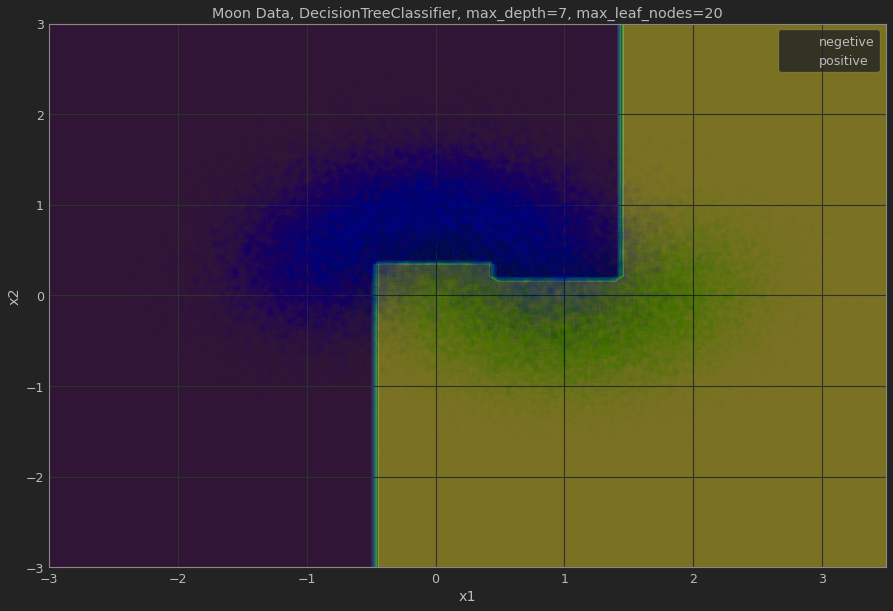

In [18]:
plot_data(X, y, dtc, 0.01)
plt.title('Moon Data, DecisionTreeClassifier, max_depth=7, max_leaf_nodes=20')
plt.show()

So we obtain ~86% accuracy

In [19]:
# export the graph (saved as png later)
from sklearn.tree import export_graphviz
export_graphviz(
    dtc,
    out_file = 'moon_decision_tree.dot',
    feature_names = ['x1', 'x2'],
    class_names = ['A', 'B'],
    rounded = True,
    filled = True
)

# Custom Forest

# Split the training set into 1000 random sets of size 1000

In [20]:
from sklearn.model_selection import ShuffleSplit

In [21]:
splitter = ShuffleSplit(n_splits=1000, train_size=0.0125, random_state=0)
X_train_splits = []
y_train_splits = []
for train_index, other_index in splitter.split(X_train):
    X_train_splits.append(X_train[train_index])
    y_train_splits.append(y_train[train_index])

In [22]:
len(X_train_splits)

1000

In [23]:
X_train_splits[0].shape

(1000, 2)

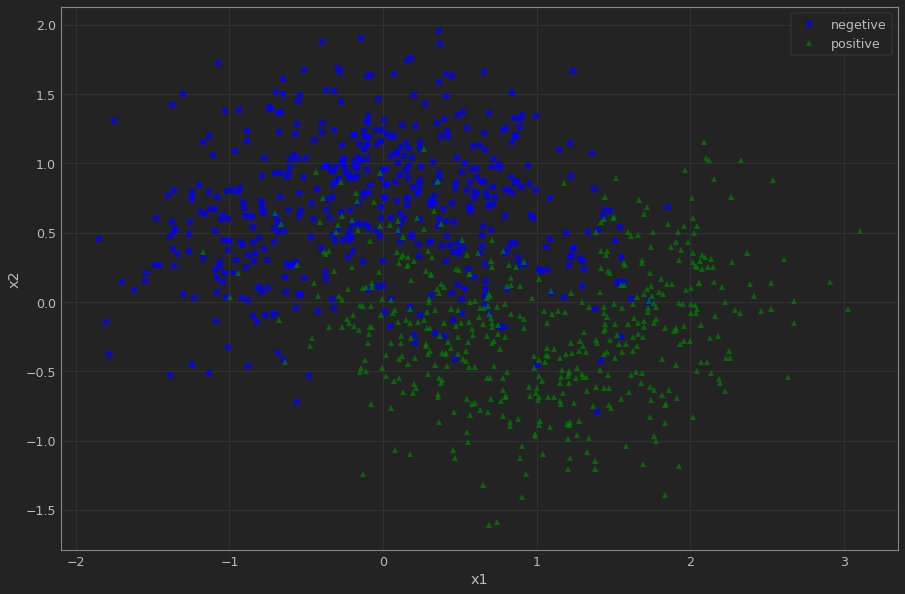

In [24]:
plot_data(X_train_splits[0], y_train_splits[0], None, 0.7)

# Train 1000 different decision trees

In [25]:
dtc_splits = []
accuracy_splits = []
y_test_pred_i = []

for i in range(len(X_train_splits)):
    dtc_i = DecisionTreeClassifier(max_depth=7, max_leaf_nodes=20)
    dtc_i.fit(X_train_splits[i], y_train_splits[i])
    y_pred_i = dtc_i.predict(X_test)
    accuracy_i = accuracy_score(y_test, y_pred_i)
    dtc_splits.append(dtc_i)
    accuracy_splits.append(accuracy_i)
    y_test_pred_i.append(y_pred_i)

In [26]:
accuracy_arr = np.array(accuracy_splits)
print('Mean accuracy = ', np.mean(accuracy_arr), ', std deviation = ', np.std(accuracy_arr))

Mean accuracy =  0.8424005 , std deviation =  0.006261973710420701


# Evaluate forest prediction as the mode of all these decision trees

In [27]:
y_pred_concat = np.array(y_test_pred_i).T
y_pred_concat.shape

(20000, 1000)

In [28]:
from scipy import stats
y_pred_mode = stats.mode(y_pred_concat, axis = 1)

In [29]:
y_pred_mode.mode.shape

(20000, 1)

# Notice slight increase in final accuracy

In [30]:
y_pred_forest = y_pred_mode.mode.ravel()
forest_accuracy = accuracy_score(y_test, y_pred_forest)

In [31]:
forest_accuracy

0.86035